In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv("F:/Spyder/winequality.csv")

In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [6]:
# To check for null values
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
# Thank God their is no null value and in case their is
dataset = dataset.fillna(method='ffill')
# that will remove the null value


In [14]:
# this is arrange attributes into a list for use 
a = dataset.columns
b = []
for i in a:
    b.append(i)
b.pop()

'quality'

In [87]:
# Dividing the data 
x = pd.DataFrame(dataset[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values)


In [88]:
y = dataset['quality'].values

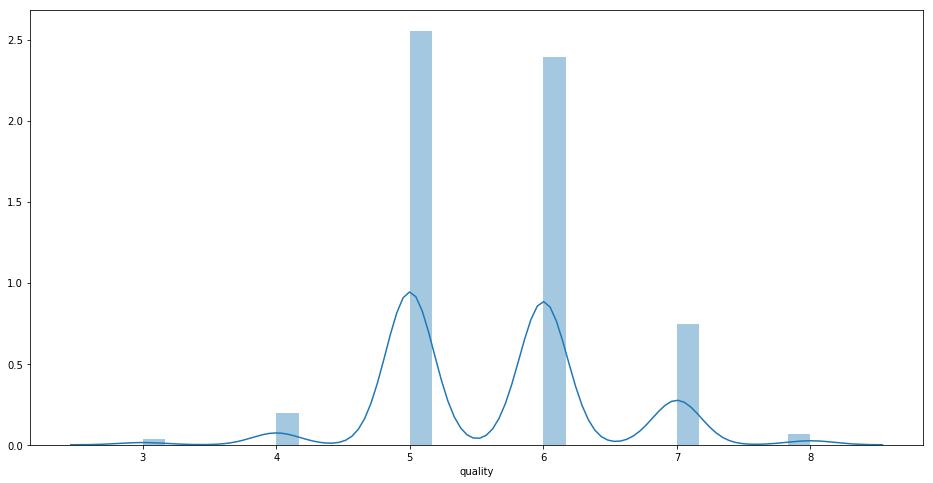

In [89]:
# to check the average value of the quality column
plt.figure(figsize=(16, 8))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

In [90]:
# splitting the dataset into 80% train and 20% test as follow
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [91]:
# Let start our Algorithm trianing in a nutshell
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
# by doing this our regression model finds the most optimal coefficient for all the attributes.

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
0,0.041284
1,-1.149528
2,-0.177927
3,0.027870
4,-1.873407
5,0.002684
6,-0.002777
7,-31.516666
8,-0.254486
9,0.924040


In [ ]:
'''
This means that for a unit increase in “density”, there is a decrease of 31.51 units in the
quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87
units in the quality of the wine.
'''

In [96]:
# Now to the prediction
predict_y = regressor.predict(x_test)

In [99]:
# to Check diffrence btw the actual and the predicted

df = pd.DataFrame({'Acutal': y_test, 'Predicted': predict_y})

In [100]:
df

,Acutal,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


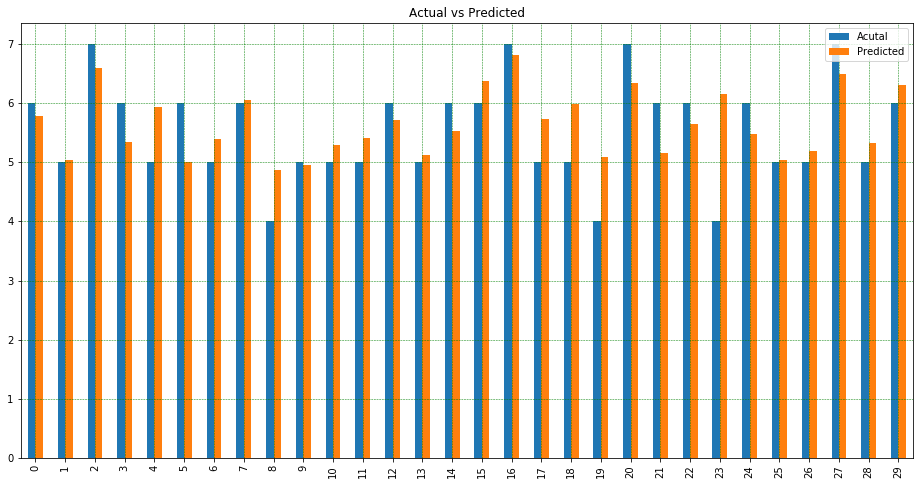

In [111]:
# The Visualization of it all
DFrame1 = df.head(30)

DFrame1.plot(kind='bar', figsize=(16, 8))
plt.grid(which='major', linestyle='--',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', c='pink')
plt.title('Actual vs Predicted')
plt.savefig('actualvspredicted.pdf')
plt.show()

### wooooow! that was a lovely and awsome prediction, all thanks to our algorithm, (Ahem!)

# Now to PERFORMANCE 

In [112]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_y))
print('Root Mean Squered Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_y)))

Mean Absolute Error: 0.46963309286611177
Mean Squared Error: 0.3844711978201253
Root Mean Squered Error: 0.6200574149384275
